   # TP53: Effects of Mutation on Interacting Proteins

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### List of proteins that interact with TP53 (according to Uniprot and String)

In [4]:
gene = 'TP53'
protList = ['TGFB1', 'AXIN1', 'EP300', 'HRMT1L2', 'CARM1', 'TAF1', 'ING4', 'CABLES1', 
            'TP73', 'HIPK1', 'HIPK2', 'TP53INP1', 'TP53BP', 'WWOX', 'HCV', 'USP7', 'SYVN1', 'HSP90AB1',
           'CHD8', 'ARMC10', 'BANP', 'CDKN2AIP', 'NUAK1', 'STK11', 'LKB1', 'UHRF2', 'E4F1', 'YWHAZ',
           'MAML1', 'MKRN1', 'PML', 'MDM2', 'FBXO42', 'ATM', 'PP2R2A', 'AURKA', 'DAXX', 'BRD7', 'TRIM24',
           'L3MBTL1', 'GRK5', 'CAK', 'PTK2B', 'PYK2', 'MDM2', 'PRKCG', 'PPIF', 'KAT6A', 'UBC9', 'ZNF385B',
           'ZNF385A', 'ANKRD2', 'RFFL', 'RNF34', 'MTA1', 'COP1', 'CCAR2', 'MORC3', 'POU4F2', 'AFG1L', 'UBD',
           'TAF6', 'HPV', 'UL123', 'E1B-55K', 'BAX', 'FAS', 'BCL2', 'CREBBP', 'CDK2', 'MDM2', 'CDKN2A', 'ATM',
            'CCNB1', 'TERT', 'IGF1R', 'ALB', 'MMP1']

gene = 'PTEN'
protList = ['AKT1', 'PIK3R2', 'PIK3R1', 'PIK3CB', 'PIK3CA', 'PTK2', 'USP7', 'TP53', 'PDGFRB', 'MAGI2', 'MAGI3', 'MAST1', 'MAST3', 'NDFIP1', 'NDFIP2',
           'FRK', 'ROCK1', 'STK11']

## t-test for effects of missense mutations

In [5]:
tested = [];
p_vals = [];

cutoff = 0.05/len(protList)
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross.loc[cross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if ttest[1] < cutoff:
            print(protein, " ", ttest[1])
        p_vals.append(ttest[1])

In [6]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]

### List of significantly affected proteins and their respective p-values (FDR adjusted)

In [7]:
#print(significant_proteins)
#print(significant_pvals)

## t-test for effects of frame shift and nonsense mutations (truncating)

In [9]:
tested = [];
p_vals = [];
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross.loc[cross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[(cross["Mutation"] == "Frame_Shift_Del") | 
                            (cross["Mutation"] == "Frame_Shift_Ins") |
                            (cross["Mutation"] == 'Nonsense_Mutation')]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if ttest[1] < cutoff:
            print(protein, " ", ttest[1])
        p_vals.append(ttest[1])

PIK3CA   6.661356481649149e-05
TP53   0.00012955032074629447


In [10]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]

In [11]:
#print(significant_proteins)
#print(significant_pvals)

## t-test for effects of missense and truncating mutations combined

In [12]:
tested = [];
p_vals = [];
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross.loc[cross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[(cross["Mutation"] == "Frame_Shift_Del") | 
                            (cross["Mutation"] == "Frame_Shift_Ins") |
                            (cross["Mutation"] == 'Nonsense_Mutation') |
                            (cross["Mutation"] == 'Missense_Mutation')]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if ttest[1] < cutoff:
            print(protein, " ", ttest[1])
        p_vals.append(ttest[1])

PIK3CA   5.466584409144104e-05
TP53   0.00015886590461962268


In [13]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]

In [14]:
#print(significant_proteins)
#print(significant_pvals)

## t-test for effects of all mutations

In [17]:
tested = [];
p_vals = [];
significantResults =  list()
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross.loc[cross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] != "Wildtype"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if ttest[1] < cutoff:
            print(protein, " ", ttest[1])
            significantResults.append(protein)
        p_vals.append(ttest[1])

PIK3CA   5.5710059173315194e-05
TP53   0.00013232110188039883


In [ ]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]

In [ ]:
#print(significant_proteins)
#print(significant_pvals)

### Build the dataframe for plotting

In [18]:
plotdf = CPTAC.compare_mutations(proteomics, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation', gene]]

for protein in significantResults:
    if(protein != 'PTEN'):
        proteindf = CPTAC.compare_mutations(proteomics, protein, gene)[[protein]]
        plotdf = plotdf.join(proteindf)

In [19]:
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Missense'
                                     }})

In [20]:
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Protein', value_name='Proteomics')
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)

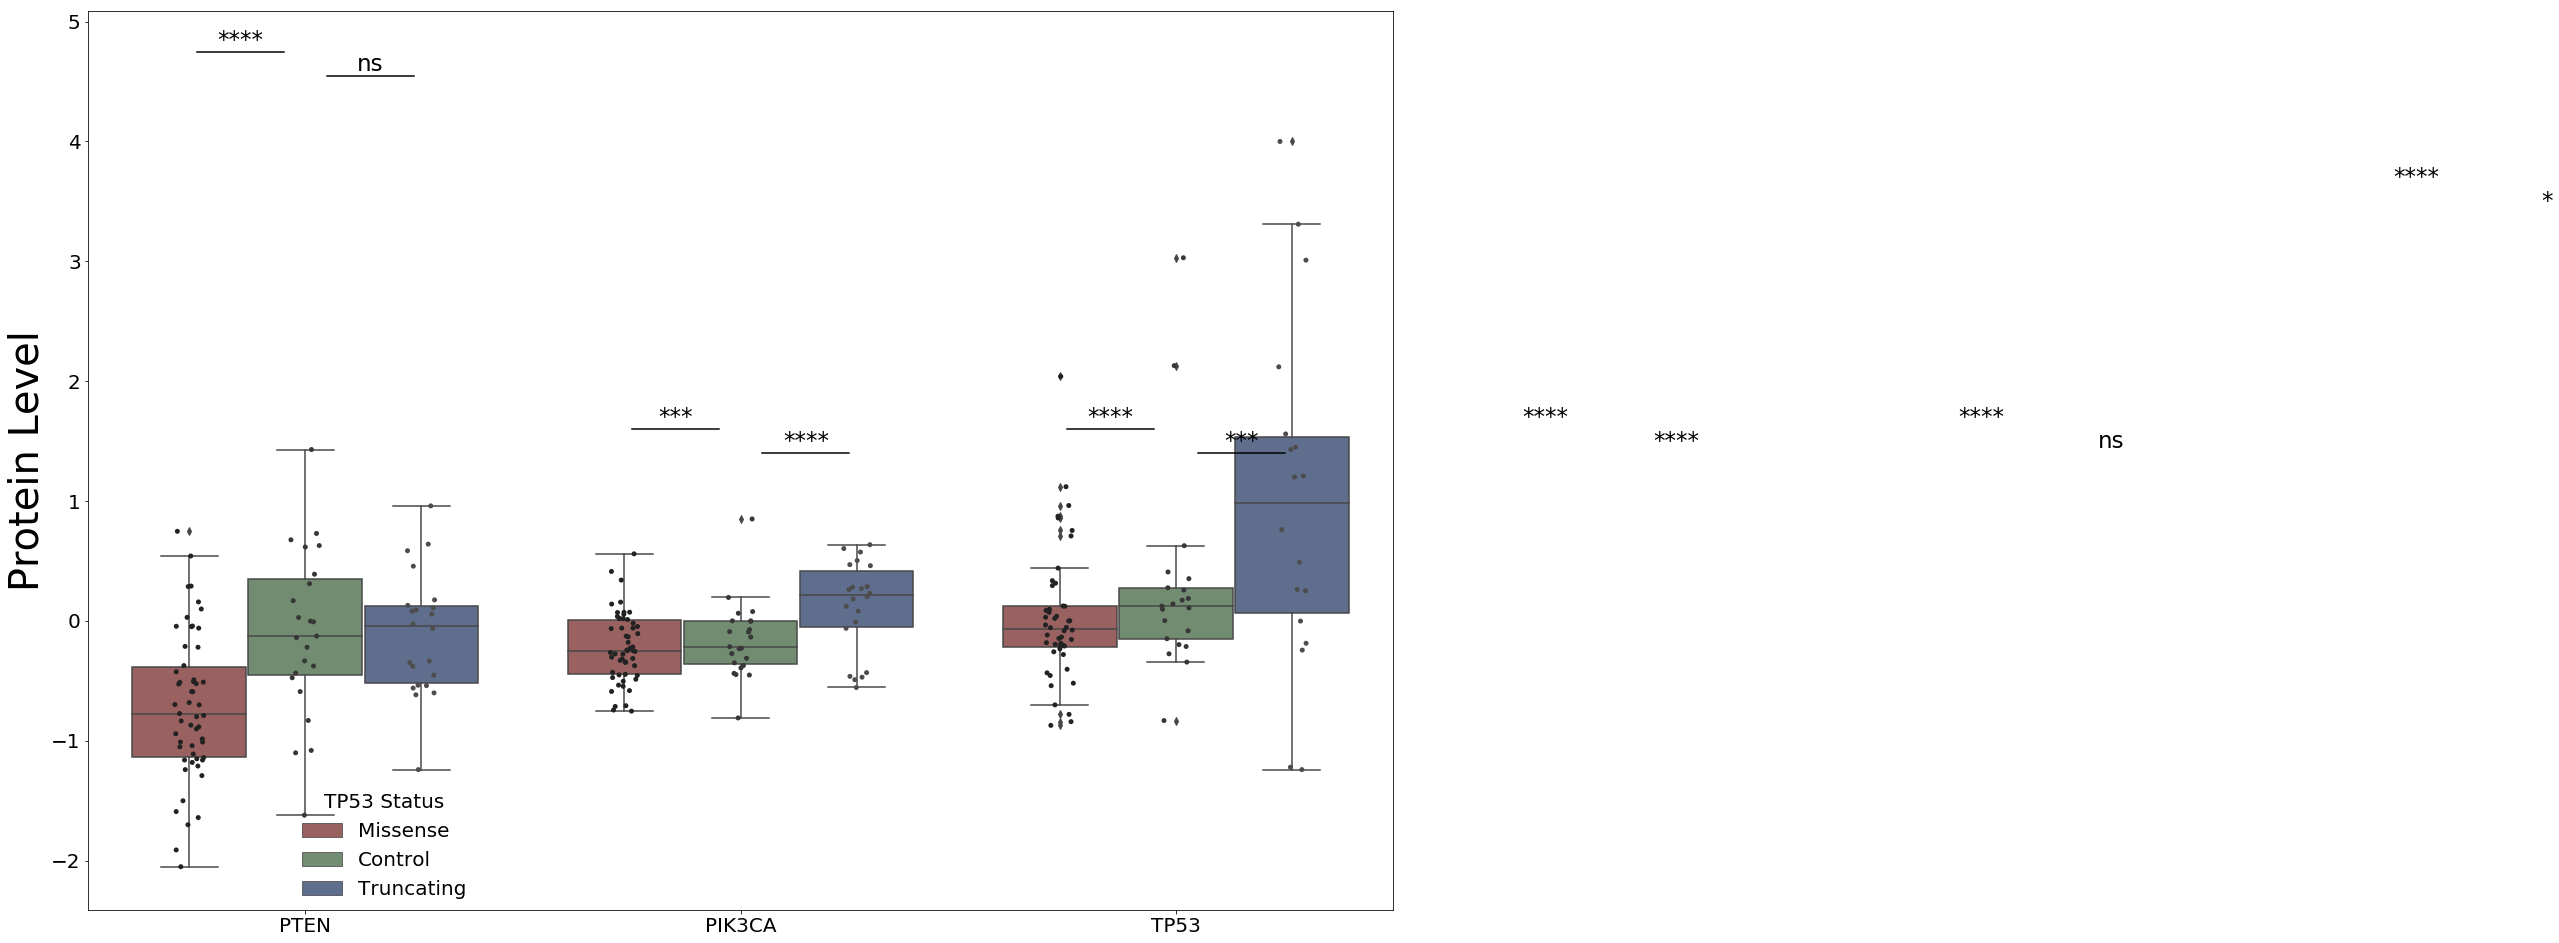

In [21]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Missense": "#6C906D", "Control": "#596B94", "Truncating": "#A35857"}

#Create the plot
boxplt = sns.boxplot(x='Protein', y='Proteomics', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Proteomics', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Protein Level', fontsize='40')
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control', 'Truncating'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((0.15, 0.15, 0, 0))

#Add significance indicator: TP53/Missense
x1, x2 = -0.25, -0.05
y, h, col = 4.45, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: TP53/Truncation
x1, x2 = 0.05, 0.25
y, h, col = 4.25, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: CABLES1/Missense
x1, x2 = 0.75, 0.95
y, h, col = 1.3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: CABLES1/Truncation
x1, x2 = 1.05, 1.25
y, h, col = 0.8 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: HSP90AB1/Missense
x1, x2 = 1.75, 1.95
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: HSP90AB1/Truncation
x1, x2 = 2.05, 2.25
y, h, col = 0.8 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: CHD8/Missense
x1, x2 = 2.75, 2.95
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: CHD8/Truncation
x1, x2 = 3.05, 3.25
y, h, col = 0.8 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: UHRF2/Missense
x1, x2 = 3.75, 3.95
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: UHRF2/Truncation
x1, x2 = 4.05, 4.25
y, h, col = 0.8 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: AURKA/Missense
x1, x2 = 4.75, 4.95
y, h, col = 3 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='23')

#Add significance indicator: AURKA/Truncation
x1, x2 = 5.05, 5.25
y, h, col = 2.8 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize='23')

fig = boxplt.get_figure()
fig.savefig('p53_trans.png', dpi=300)
plt.show()

## Phosphoproteome abundance of interacting proteins

### This is the same list as before, with some of the end numbers of the proteins removed; less specificity in protein names captures more potentially significant results in the phosphoproteomic data

In [6]:
gene = 'TP53'
phosProtList = ['TGFB1', 'AXIN1', 'EP300', 'HRMT1L2', 'CARM1', 'TAF1', 'ING4', 'CABLES1', 
            'TP73', 'HIPK1', 'HIPK2', 'TP53INP1', 'TP53BP', 'WWOX', 'HCV', 'USP7', 'SYVN1', 'HSP90AB1',
           'CHD8', 'ARMC10', 'BANP', 'CDKN2AIP', 'NUAK1', 'STK11', 'LKB1', 'UHRF2', 'E4F1', 'YWHAZ',
           'MAML1', 'MKRN1', 'PML', 'MDM2', 'FBXO42', 'ATM', 'PP2R2A', 'AURKA', 'DAXX', 'BRD7', 'TRIM24',
           'L3MBTL1', 'GRK5', 'CAK', 'PTK2B', 'PYK2', 'MDM2', 'PRKCG', 'PPIF', 'KAT6A', 'UBC9', 'ZNF385B',
           'ZNF385A', 'ANKRD2', 'RFFL', 'RNF34', 'MTA1', 'COP1', 'CCAR2', 'MORC3', 'POU4F2', 'AFG1L', 'UBD',
           'TAF6', 'HPV', 'UL123', 'E1B-55K', 'BAX', 'FAS', 'BCL2', 'CREBBP', 'CDK2', 'MDM2', 'CDKN2A', 'ATM',
            'CCNB1', 'TERT', 'IGF1R', 'ALB', 'MMP1']

In [10]:
sitedf = CPTAC.compare_mutations(phos, 'TP53-S315', gene)
sitedf

,TP53-S315,Mutation,Patient_Type
S001,NaN,Missense_Mutation,Tumor
S002,0.646000,Wildtype,Tumor
S003,-0.800000,Wildtype,Tumor
S004,1.660000,Missense_Mutation,Tumor
S005,NaN,Wildtype,Tumor
S006,3.760000,Missense_Mutation,Tumor
S007,-0.597000,Wildtype,Tumor
S008,0.346000,Missense_Mutation,Tumor
S009,-0.266000,Nonsense_Mutation,Tumor
S010,0.059100,Wildtype,Tumor


In [12]:
pcutoff = 0.05 / len(phos.columns)
gene = 'TP53'
p_values = []
site_names = []

for site in phos.columns:
    if(site != gene and site != 'idx'):
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor'].dropna(axis=0)
        mutated_site = sitedf.loc[sitedf['Mutation'] != 'Wildtype']
        wt_site = sitedf.loc[sitedf['Mutation'] == 'Wildtype']
        if len(mutated_site) > 2:
            ttest = scipy.stats.ttest_ind(mutated_site[site], wt_site[site])
            if ttest[1] <= pcutoff:
                print(site)
                print(ttest)                

ACAP2-S379
Ttest_indResult(statistic=5.584922959854958, pvalue=2.0928008546907557e-07)
AIF1L-S160
Ttest_indResult(statistic=5.627812345689005, pvalue=1.7351033560196802e-07)
CENPF-S1722
Ttest_indResult(statistic=5.855601131175288, pvalue=1.40618346876695e-07)
CHEK2-S163
Ttest_indResult(statistic=6.6305274586646785, pvalue=1.7725206790447915e-08)
DNMT3A-S390
Ttest_indResult(statistic=5.686647783676332, pvalue=3.198722606290891e-07)
ESF1-S153
Ttest_indResult(statistic=7.364643602517957, pvalue=2.1839400676812538e-10)
FOXK1-S223
Ttest_indResult(statistic=5.852582373689908, pvalue=6.429375955330947e-08)
FXR1-S409
Ttest_indResult(statistic=6.438040207019647, pvalue=4.4953070675887535e-09)
FXR1-T411
Ttest_indResult(statistic=7.601164481535482, pvalue=1.7816680559272247e-11)
HJURP-S473
Ttest_indResult(statistic=5.422631596564276, pvalue=4.7066148378401633e-07)
HMGA1-S44
Ttest_indResult(statistic=5.338271235986477, pvalue=6.06923229540704e-07)
HSP90AB1-S255
Ttest_indResult(statistic=5.98860689

/anaconda3/envs/ptmresearch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/envs/ptmresearch/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TCOF1-S583
Ttest_indResult(statistic=5.680148669901479, pvalue=1.379139610380399e-07)
TOP2A-S1247
Ttest_indResult(statistic=5.717240450741866, pvalue=1.330193085994742e-07)
TOP2A-S1377
Ttest_indResult(statistic=5.584633402366059, pvalue=2.0954461206568472e-07)
TOP2A-S1393
Ttest_indResult(statistic=5.889800441682831, pvalue=2.422370278562358e-07)
TP53-S315
Ttest_indResult(statistic=5.461805676393611, pvalue=5.572977461429709e-07)
TP53BP1-S1763
Ttest_indResult(statistic=7.687154722386778, pvalue=3.307433804821374e-11)
TP53BP1-S1764
Ttest_indResult(statistic=5.650805451544988, pvalue=2.3686027832938366e-07)
USP51-S26
Ttest_indResult(statistic=10.428651518636508, pvalue=2.271386374366031e-07)
USP8-S719
Ttest_indResult(statistic=-5.405582807470919, pvalue=4.5492049360333684e-07)
UTP14A-S445
Ttest_indResult(statistic=5.7659415412569475, pvalue=1.508473305168412e-07)
WDR75-S779
Ttest_indResult(statistic=5.363174905068154, pvalue=5.456352230422431e-07)
ZFAND3-S129
Ttest_indResult(statistic=5.5

In [15]:
pcutoff = 0.001
gene = 'PIK3CA'
p_values = []
site_names = []

for site in phos.columns:
    if(site != gene and site != 'idx'):
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor'].dropna(axis=0)
        mutated_site = sitedf.loc[sitedf['Mutation'] != 'Wildtype']
        wt_site = sitedf.loc[sitedf['Mutation'] == 'Wildtype']
        if len(mutated_site) > 2 and len(wt_site) > 2:
            ttest = scipy.stats.ttest_ind(mutated_site[site], wt_site[site])
            if ttest[1] <= pcutoff:
                print(site)
                print(ttest)     

ATXN2-S684
Ttest_indResult(statistic=3.655877883159149, pvalue=0.0004143865925924668)
BACH2-S510
Ttest_indResult(statistic=-4.483054616952817, pvalue=0.0007484241489183486)
CARD11-S448
Ttest_indResult(statistic=-5.780529532874567, pvalue=0.0002658892492140297)
CGN-S168
Ttest_indResult(statistic=4.327756281512896, pvalue=0.0005975148332866843)
CTNNB1-T41
Ttest_indResult(statistic=-7.323236669966868, pvalue=0.0007442445738937455)
DAXX-T420
Ttest_indResult(statistic=-4.669739577116847, pvalue=0.0008811556706892382)
DES-S47
Ttest_indResult(statistic=-4.295944907747133, pvalue=0.0008697834923291664)
EXOC4-S468
Ttest_indResult(statistic=-5.032285910854635, pvalue=6.924481714683101e-06)
FAM120A-Y395
Ttest_indResult(statistic=11.352798979430741, pvalue=0.0003432439478581016)
FERMT2-S673
Ttest_indResult(statistic=-3.4157079773770427, pvalue=0.0009447398272045617)
GATAD1-S235
Ttest_indResult(statistic=14.381372503515209, pvalue=0.00013585610818085095)
HELZ-S1767
Ttest_indResult(statistic=3.40067

## Plot phosphorylation at one site

In [ ]:
sitedf = CPTAC.compare_mutations(phos, site, gene)
sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor'].dropna(axis=0)
mutated_site = sitedf.loc[sitedf['Mutation'] != 'Wildtype']
wt_site = sitedf.loc[sitedf['Mutation'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated_site[site], wt_site[site])
print(ttest)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p53_mutations_protein, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p53_mutations_protein, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
boxplt.set_title("Effect of TP53 mutation on " + protein + " protein levels", fontsize='22')
plt.show()

### Look at truncating mutations

In [48]:
sites = phos.columns
p_values = []
site_names = []

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[(sitedf["Mutation"] == "Frame_Shift_Del") | 
                            (sitedf["Mutation"] == "Frame_Shift_Ins") |
                            (sitedf["Mutation"] == 'Nonsense_Mutation')].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)     
                
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

print(significant_sites)
print(significant_pvalues)

['TAF1D-S206' 'HIPK1-T1027' 'TP53BP1-S1431' 'TP53BP1-S1683'
 'TP53BP1-S1706' 'TP53BP1-S1763' 'TP53BP1-S1764' 'TP53BP1-S867'
 'HSP90AB1-S226' 'HSP90AB1-S255' 'HSP90AB1-S261' 'CHD8-S1420' 'CHD8-S1424'
 'CHD8-S1995' 'CHD8-S549' 'FASN-S2198' 'FASN-T2204' 'BCL2L12-S273']
[0.04492884 0.03343621 0.04492884 0.03343621 0.03271287 0.00202
 0.04503339 0.03558846 0.0272901  0.00202    0.00498404 0.03343621
 0.03558846 0.03343621 0.03271287 0.02017401 0.03271287 0.03343621]


## Missense and truncating

In [50]:
sites = phos.columns
p_values = []
site_names = []

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[(sitedf["Mutation"] == "Frame_Shift_Del") | 
                        (sitedf["Mutation"] == "Frame_Shift_Ins") |
                        (sitedf["Mutation"] == 'Nonsense_Mutation') |
                        (sitedf["Mutation"] == 'Missense_Mutation')            ].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)       

areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

print(significant_sites)
print(significant_pvalues)

['TGFB1I1-S192' 'CABLES1-S373' 'CABLES1-T415' 'HIPK1-S1200' 'HIPK1-T1027'
 'TP53BP1-S1109' 'TP53BP1-S1431' 'TP53BP1-S1435' 'TP53BP1-S1683'
 'TP53BP1-S1706' 'TP53BP1-S1763' 'TP53BP1-S1764' 'TP53BP1-S400'
 'TP53BP1-S403' 'TP53BP1-S557' 'TP53BP1-S640' 'TP53BP1-S644'
 'TP53BP1-S645' 'TP53BP1-S776' 'TP53BP1-S867' 'TP53BP1-S998'
 'TP53BP1-T1653' 'HSP90AB1-S226' 'HSP90AB1-S255' 'HSP90AB1-S261'
 'HSP90AB1-S445' 'CHD8-S1420' 'CHD8-S1995' 'CHD8-S2008' 'CHD8-S549'
 'CHD8-S562' 'CHD8-T1982' 'CDKN2AIP-S131' 'DAXX-S680' 'MTA1-T564'
 'FASN-S207' 'FASN-T2204' 'BCL2L12-S273' 'BCL2L13-S444' 'CREBBP-T974'
 'CDKN2AIP-S131' 'RALBP1-S30']
[4.83396943e-02 1.02748279e-02 1.71077907e-02 2.26293623e-02
 3.31176397e-03 5.10409707e-03 1.59419677e-05 3.56867481e-05
 4.05486152e-05 4.91755490e-07 7.77961292e-07 1.04397887e-03
 3.86388492e-02 5.10409707e-03 3.98470422e-02 9.00020989e-03
 4.27340920e-02 1.18523003e-02 3.14587547e-02 1.59419677e-05
 4.91988605e-02 1.07792725e-02 4.05486152e-05 4.91755490e-07
 2.381236

### Look at all mutations

In [49]:
sites = phos.columns
p_values = []
site_names = []

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf["Mutation"] != 'Wildtype'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)       

areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

print(significant_sites)
print(significant_pvalues)

['TGFB1I1-S137' 'TGFB1I1-S143' 'TGFB1I1-S192' 'TGFB1I1-S68' 'TAF15-S97'
 'CABLES1-S109' 'CABLES1-S290' 'CABLES1-S373' 'CABLES1-S418'
 'CABLES1-T415' 'HIPK1-S1200' 'HIPK1-T1027' 'TP53BP1-S1004'
 'TP53BP1-S1099' 'TP53BP1-S1109' 'TP53BP1-S1431' 'TP53BP1-S1435'
 'TP53BP1-S1683' 'TP53BP1-S1706' 'TP53BP1-S1763' 'TP53BP1-S1764'
 'TP53BP1-S400' 'TP53BP1-S403' 'TP53BP1-S525' 'TP53BP1-S557'
 'TP53BP1-S640' 'TP53BP1-S644' 'TP53BP1-S645' 'TP53BP1-S776'
 'TP53BP1-S867' 'TP53BP1-T1653' 'TP53BP1-T307' 'HSP90AB1-S226'
 'HSP90AB1-S255' 'HSP90AB1-S261' 'HSP90AB1-S445' 'CHD8-S1420' 'CHD8-S1995'
 'CHD8-S2008' 'CHD8-S549' 'CHD8-S562' 'CHD8-T1982' 'CDKN2AIP-S131'
 'STK11IP-S599' 'DAXX-S680' 'TRIM24-S1025' 'TRIM24-S1028' 'ANKRD26-S631'
 'MTA1-T564' 'TAF6-S673' 'FASN-S207' 'FASN-S2198' 'FASN-T2204'
 'BCL2L12-S273' 'BCL2L13-S444' 'CREBBP-S121' 'CREBBP-T974' 'CDKN2AIP-S131'
 'RALBP1-S30']
[4.73928331e-02 4.24683358e-02 1.30612019e-02 1.96788056e-02
 4.87173544e-02 4.04222291e-02 2.81107614e-02 5.42094133e-03
 2